### 2021資料
* GDSC_PDX_Paclitaxel
> 399 rows x 16191 columns
* GDSC_PDX_Paclitaxel_info
> 426 rows x 5 columns
* CCLE_PDX_Paclitaxel
> 469 rows x 16383 columns

In [1]:
import numpy as np
import pandas as pd
# GDSC.shape 874 x 7964
GDSC_PDX_Paclitaxel = pd.read_csv('data/GDSC_PDX_Paclitaxel.csv')
GDSC_PDX_Paclitaxel.columns.values[0] = "CELL_LINE_NAME"
GDSC_PDX_Paclitaxel

,CELL_LINE_NAME,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MRPL46,HPR,MIA,LINC00514,OR1D5,ZNF234,MYH4,LINC00526,KRT18P55,TBC1D3P5
0,MC-CAR,-1.184016,0.468235,0.485299,0.951035,0.705346,3.574280,-0.334766,-0.167187,-0.829344,...,0.639887,0.113480,0.157138,-0.504232,0.283905,-0.785013,0.443411,0.684380,-0.006255,1.037289
1,SK-ES-1,0.949128,-0.099122,-1.142175,0.221316,0.582377,-0.500133,0.163121,-1.660569,-0.434605,...,-0.518210,-1.023453,-0.407149,-0.924217,-0.198564,-0.366830,-0.151292,0.246662,-0.534830,-0.214098
2,8-MG-BA,0.788220,0.840168,0.628150,-1.331285,-0.248648,-0.386293,-0.297668,0.815664,-0.212430,...,-1.083025,0.357081,-0.078537,-0.376219,-0.914794,0.283323,-0.551244,-0.333331,0.038996,-0.114577
3,GB-1,0.053174,-0.648190,-0.181854,-0.633104,-0.947646,-0.469195,-0.684658,0.421926,-0.905626,...,-0.830098,-1.200791,-0.194579,-0.275438,-0.562004,0.634896,-0.366795,0.442662,-1.225924,0.757517
4,NCI-H1648,1.519261,-0.368292,0.226856,-0.179698,-0.865956,-0.440831,1.035865,0.896539,1.694665,...,0.313644,-0.783564,-0.480206,-0.311198,-0.414697,-0.112886,-0.841901,0.379371,1.731215,-1.545600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,CL-11,0.509973,0.547057,-0.601671,-0.464114,0.005193,-0.483587,-0.443398,0.765826,-0.753786,...,1.578933,0.599214,0.454603,0.216259,-1.002894,-1.029649,0.684973,-0.045526,-0.431420,-0.068895
395,COR-L95,-0.206808,-1.340759,-0.545395,-0.429504,-0.561951,-0.619859,-0.649944,0.262877,2.319067,...,-2.464711,-0.524581,-0.416340,-0.736149,-1.753831,-0.127193,-0.499025,0.121546,0.148885,-0.132204
396,NCI-H2135,1.066798,0.060061,-0.570217,-0.570037,-0.342490,-0.252140,-0.148907,1.091669,2.366973,...,1.378062,-1.094202,-0.095038,-0.397918,0.051392,-0.628697,0.355916,0.640426,-0.067006,1.074772
397,ME-1,-1.079919,-0.198108,0.063834,0.553150,-0.359821,-0.325923,-0.550151,0.341530,0.670671,...,-0.532261,0.974459,0.303012,-0.517000,-0.301867,1.009828,-0.353051,-1.128451,0.978038,1.259332


In [2]:
print(f'因為是做classification問題，依照IC50以及「最大用藥濃度」，\n在原dataframe中加入一行 "R_or_S" 當做要分類的目標。')
GDSC_PDX_Paclitaxel_info = pd.read_csv('data/GDSC_PDX_Paclitaxel_info.csv', index_col=0)
R_or_S_bool = np.asarray(GDSC_PDX_Paclitaxel_info["IC50"]>0.1024)
R_or_S = []
for i in range(len(R_or_S_bool)):
    if R_or_S_bool[i] == True:
        R_or_S.append(0)
    else:
        R_or_S.append(1)
GDSC_PDX_Paclitaxel_info = GDSC_PDX_Paclitaxel_info.assign(R_or_S = R_or_S)
GDSC_PDX_Paclitaxel_info

因為是做classification問題，依照IC50以及「最大用藥濃度」，
在原dataframe中加入一行 "R_or_S" 當做要分類的目標。


,CELL_LINE_NAME,MAX_CONC_MICROMOLAR,IC50,R_or_S
1,MC-CAR,0.1024,0.026059,1
2,ES3,0.1024,0.823045,0
3,ES5,0.1024,1.132950,0
4,ES7,0.1024,1.119814,0
5,EW-11,0.1024,2.753277,0
...,...,...,...,...
422,Toledo,0.1024,0.072571,1
423,WIL2-NS,0.1024,0.005161,1
424,WSU-DLCL2,0.1024,0.079155,1
425,MKL-1-subclone-2,0.1024,0.012390,1


In [3]:
# Docetaxel_info.shape 882 x 5
CCLE_PDX_Paclitaxel = pd.read_csv('data/CCLE_PDX_Paclitaxel.csv')
CCLE_PDX_Paclitaxel.columns.values[0] = "CELL_LINE_NAME"
CCLE_PDX_Paclitaxel

,CELL_LINE_NAME,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,...,WWC2,WWC3,WWOX,WWP1,WWP2,WWTR1,XAB2,XAF1,XAGE3,XAGE5
0,22RV1_PROSTATE,0.775266,1.340437,1.125580,0.175305,0.472983,-0.910305,1.741850,1.408660,1.229710,...,1.196219,1.061770,0.964826,1.417611,1.420964,1.132964,1.624045,0.036481,0.358927,0.387453
1,42MGBA_CENTRAL_NERVOUS_SYSTEM,1.133386,-1.026812,0.125871,-1.026812,0.696926,0.228324,1.552878,1.081658,0.444638,...,1.415945,1.177418,0.841848,1.282522,1.232678,1.358025,1.522461,0.804841,-1.026812,-1.026812
2,5637_URINARY_TRACT,0.022117,-0.991209,0.217480,1.012588,1.297478,-0.991209,1.556874,1.199188,-0.991209,...,1.406805,1.408769,0.989993,1.410864,1.295599,1.239702,1.607104,1.030290,-0.991209,-0.991209
3,639V_URINARY_TRACT,0.973198,-1.087801,-0.148105,-0.417490,0.625598,0.241110,1.513675,1.077493,0.091492,...,1.324314,1.219461,-0.164323,1.368473,1.115155,1.246357,1.499558,0.580831,-1.087801,-1.087801
4,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,1.169179,-1.028292,0.465891,-0.163033,0.008992,-0.076229,1.611807,0.730032,0.931754,...,0.223194,1.424845,1.191023,1.335067,1.288845,0.891905,1.559839,1.037151,-1.028292,-1.028292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,SKCO1_LARGE_INTESTINE,0.082939,0.069513,0.180665,0.874991,0.360915,0.365550,1.714129,1.308940,-0.054334,...,0.528041,0.257052,0.928405,1.558230,1.466095,1.266036,1.572237,0.133136,-0.889931,-0.889931
465,SNU449_LIVER,0.329194,-0.862985,0.321539,-0.862985,1.240156,0.700469,1.684887,1.295932,0.625017,...,1.438325,1.427298,1.202976,1.637519,1.401277,1.828233,1.593913,0.226257,-0.862985,-0.862985
466,T47D_BREAST,1.370118,0.108176,0.430079,0.639420,1.445329,0.778823,1.922907,1.501275,0.384548,...,1.610535,2.029795,1.379566,1.706726,1.657003,1.570593,1.819676,0.354965,-0.702386,-0.702386
467,UACC257_SKIN,1.022618,-1.018997,1.316034,-0.309005,-1.018997,0.107777,1.599685,0.961408,0.334584,...,1.161265,1.156945,1.152997,1.315930,1.253381,1.402175,1.496510,-0.005438,-1.018997,-1.018997


---
### 先將GDSC兩個資料合併，因為須要IC50的數值以及"MAX_CONC_MICROMOLAR"來判斷是 Sensetive 還是 Resistant。(two .csv files)
* Intersecting dataframes by rows of "CELL_LINE_NAME".

In [4]:
print(f'合併後的GDSC檔案，現在dataframe中有IC50及「最大用藥濃度」')
GDSC_combination = pd.merge(GDSC_PDX_Paclitaxel,
                GDSC_PDX_Paclitaxel_info,
                how='inner',
                on=['CELL_LINE_NAME'])

GDSC_combination

合併後的GDSC檔案，現在dataframe中有IC50及「最大用藥濃度」


,CELL_LINE_NAME,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,LINC00514,OR1D5,ZNF234,MYH4,LINC00526,KRT18P55,TBC1D3P5,MAX_CONC_MICROMOLAR,IC50,R_or_S
0,MC-CAR,-1.184016,0.468235,0.485299,0.951035,0.705346,3.574280,-0.334766,-0.167187,-0.829344,...,-0.504232,0.283905,-0.785013,0.443411,0.684380,-0.006255,1.037289,0.1024,0.026059,1
1,SK-ES-1,0.949128,-0.099122,-1.142175,0.221316,0.582377,-0.500133,0.163121,-1.660569,-0.434605,...,-0.924217,-0.198564,-0.366830,-0.151292,0.246662,-0.534830,-0.214098,0.1024,0.014512,1
2,8-MG-BA,0.788220,0.840168,0.628150,-1.331285,-0.248648,-0.386293,-0.297668,0.815664,-0.212430,...,-0.376219,-0.914794,0.283323,-0.551244,-0.333331,0.038996,-0.114577,0.1024,0.005537,1
3,GB-1,0.053174,-0.648190,-0.181854,-0.633104,-0.947646,-0.469195,-0.684658,0.421926,-0.905626,...,-0.275438,-0.562004,0.634896,-0.366795,0.442662,-1.225924,0.757517,0.1024,0.040831,1
4,NCI-H1648,1.519261,-0.368292,0.226856,-0.179698,-0.865956,-0.440831,1.035865,0.896539,1.694665,...,-0.311198,-0.414697,-0.112886,-0.841901,0.379371,1.731215,-1.545600,0.1024,0.005043,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,CL-11,0.509973,0.547057,-0.601671,-0.464114,0.005193,-0.483587,-0.443398,0.765826,-0.753786,...,0.216259,-1.002894,-1.029649,0.684973,-0.045526,-0.431420,-0.068895,0.1024,1.327531,0
395,COR-L95,-0.206808,-1.340759,-0.545395,-0.429504,-0.561951,-0.619859,-0.649944,0.262877,2.319067,...,-0.736149,-1.753831,-0.127193,-0.499025,0.121546,0.148885,-0.132204,0.1024,0.188277,0
396,NCI-H2135,1.066798,0.060061,-0.570217,-0.570037,-0.342490,-0.252140,-0.148907,1.091669,2.366973,...,-0.397918,0.051392,-0.628697,0.355916,0.640426,-0.067006,1.074772,0.1024,0.109464,0
397,ME-1,-1.079919,-0.198108,0.063834,0.553150,-0.359821,-0.325923,-0.550151,0.341530,0.670671,...,-0.517000,-0.301867,1.009828,-0.353051,-1.128451,0.978038,1.259332,0.1024,0.580227,0


In [5]:
print(f'將GDSC_combination中的 "CELL_LINE_NAME", "IC50" & "R_or_S" 欄位去除，\n當做training data使用。')
train_data = GDSC_combination.drop(labels=['CELL_LINE_NAME','IC50','R_or_S'],
                                   axis=1)
train_data

將GDSC_combination中的 "CELL_LINE_NAME", "IC50" & "R_or_S" 欄位去除，
當做training data使用。


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,HPR,MIA,LINC00514,OR1D5,ZNF234,MYH4,LINC00526,KRT18P55,TBC1D3P5,MAX_CONC_MICROMOLAR
0,-1.184016,0.468235,0.485299,0.951035,0.705346,3.574280,-0.334766,-0.167187,-0.829344,0.108484,...,0.113480,0.157138,-0.504232,0.283905,-0.785013,0.443411,0.684380,-0.006255,1.037289,0.1024
1,0.949128,-0.099122,-1.142175,0.221316,0.582377,-0.500133,0.163121,-1.660569,-0.434605,0.731411,...,-1.023453,-0.407149,-0.924217,-0.198564,-0.366830,-0.151292,0.246662,-0.534830,-0.214098,0.1024
2,0.788220,0.840168,0.628150,-1.331285,-0.248648,-0.386293,-0.297668,0.815664,-0.212430,-0.595989,...,0.357081,-0.078537,-0.376219,-0.914794,0.283323,-0.551244,-0.333331,0.038996,-0.114577,0.1024
3,0.053174,-0.648190,-0.181854,-0.633104,-0.947646,-0.469195,-0.684658,0.421926,-0.905626,-0.943263,...,-1.200791,-0.194579,-0.275438,-0.562004,0.634896,-0.366795,0.442662,-1.225924,0.757517,0.1024
4,1.519261,-0.368292,0.226856,-0.179698,-0.865956,-0.440831,1.035865,0.896539,1.694665,-0.776114,...,-0.783564,-0.480206,-0.311198,-0.414697,-0.112886,-0.841901,0.379371,1.731215,-1.545600,0.1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.509973,0.547057,-0.601671,-0.464114,0.005193,-0.483587,-0.443398,0.765826,-0.753786,-1.131533,...,0.599214,0.454603,0.216259,-1.002894,-1.029649,0.684973,-0.045526,-0.431420,-0.068895,0.1024
395,-0.206808,-1.340759,-0.545395,-0.429504,-0.561951,-0.619859,-0.649944,0.262877,2.319067,-1.632986,...,-0.524581,-0.416340,-0.736149,-1.753831,-0.127193,-0.499025,0.121546,0.148885,-0.132204,0.1024
396,1.066798,0.060061,-0.570217,-0.570037,-0.342490,-0.252140,-0.148907,1.091669,2.366973,0.731261,...,-1.094202,-0.095038,-0.397918,0.051392,-0.628697,0.355916,0.640426,-0.067006,1.074772,0.1024
397,-1.079919,-0.198108,0.063834,0.553150,-0.359821,-0.325923,-0.550151,0.341530,0.670671,0.755751,...,0.974459,0.303012,-0.517000,-0.301867,1.009828,-0.353051,-1.128451,0.978038,1.259332,0.1024


In [6]:
print(f'取GDSC_combination的 "R_or_S" 欄位當做 training data 的 label')
train_data_label = GDSC_combination[['R_or_S']]
train_data_label

取GDSC_combination的 "R_or_S" 欄位當做 training data 的 label


,R_or_S
0,1
1,1
2,1
3,1
4,1
...,...
394,0
395,0
396,0
397,0


In [7]:
Columns_Intersection = GDSC_combination.columns.intersection(CCLE_PDX_Paclitaxel.columns)
GDSC_combination[Columns_Intersection]

,CELL_LINE_NAME,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,SLC35G6,OR4N3P,MRPL46,HPR,MIA,LINC00514,OR1D5,MYH4,KRT18P55,TBC1D3P5
0,MC-CAR,-1.184016,0.468235,0.485299,0.951035,0.705346,3.574280,-0.334766,-0.167187,-0.829344,...,-1.846231,-0.566142,0.639887,0.113480,0.157138,-0.504232,0.283905,0.443411,-0.006255,1.037289
1,SK-ES-1,0.949128,-0.099122,-1.142175,0.221316,0.582377,-0.500133,0.163121,-1.660569,-0.434605,...,0.513255,-0.173850,-0.518210,-1.023453,-0.407149,-0.924217,-0.198564,-0.151292,-0.534830,-0.214098
2,8-MG-BA,0.788220,0.840168,0.628150,-1.331285,-0.248648,-0.386293,-0.297668,0.815664,-0.212430,...,0.645411,-0.673028,-1.083025,0.357081,-0.078537,-0.376219,-0.914794,-0.551244,0.038996,-0.114577
3,GB-1,0.053174,-0.648190,-0.181854,-0.633104,-0.947646,-0.469195,-0.684658,0.421926,-0.905626,...,0.077844,-0.719733,-0.830098,-1.200791,-0.194579,-0.275438,-0.562004,-0.366795,-1.225924,0.757517
4,NCI-H1648,1.519261,-0.368292,0.226856,-0.179698,-0.865956,-0.440831,1.035865,0.896539,1.694665,...,-1.403287,-1.255556,0.313644,-0.783564,-0.480206,-0.311198,-0.414697,-0.841901,1.731215,-1.545600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,CL-11,0.509973,0.547057,-0.601671,-0.464114,0.005193,-0.483587,-0.443398,0.765826,-0.753786,...,1.019392,0.174648,1.578933,0.599214,0.454603,0.216259,-1.002894,0.684973,-0.431420,-0.068895
395,COR-L95,-0.206808,-1.340759,-0.545395,-0.429504,-0.561951,-0.619859,-0.649944,0.262877,2.319067,...,-1.074033,-0.756024,-2.464711,-0.524581,-0.416340,-0.736149,-1.753831,-0.499025,0.148885,-0.132204
396,NCI-H2135,1.066798,0.060061,-0.570217,-0.570037,-0.342490,-0.252140,-0.148907,1.091669,2.366973,...,3.252166,-0.225209,1.378062,-1.094202,-0.095038,-0.397918,0.051392,0.355916,-0.067006,1.074772
397,ME-1,-1.079919,-0.198108,0.063834,0.553150,-0.359821,-0.325923,-0.550151,0.341530,0.670671,...,-2.644663,-1.718953,-0.532261,0.974459,0.303012,-0.517000,-0.301867,-0.353051,0.978038,1.259332


In [8]:
CCLE_PDX_Paclitaxel[Columns_Intersection]

,CELL_LINE_NAME,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,SLC35G6,OR4N3P,MRPL46,HPR,MIA,LINC00514,OR1D5,MYH4,KRT18P55,TBC1D3P5
0,22RV1_PROSTATE,1.204591,-0.910305,1.755537,1.417053,1.409410,-0.104036,0.407742,1.700561,1.792728,...,0.635047,0.419469,1.578108,0.088949,-0.910305,0.435686,-0.910305,-0.910305,0.237652,-0.910305
1,42MGBA_CENTRAL_NERVOUS_SYSTEM,1.413846,-1.026812,1.736997,1.070785,1.109813,-0.057624,0.524472,1.598875,1.125621,...,0.310563,0.184717,1.490731,-1.026812,0.277465,-1.026812,-1.026812,-1.026812,-1.026812,-1.026812
2,5637_URINARY_TRACT,1.628673,-0.991209,1.749633,1.133871,1.355926,0.387527,0.898571,1.683850,1.218127,...,-0.991209,-0.991209,1.487167,-0.010632,0.959703,-0.991209,-0.991209,-0.991209,-0.991209,-0.991209
3,639V_URINARY_TRACT,1.401939,-1.087801,1.704798,0.987165,1.060926,-0.282543,1.209793,1.606918,1.272581,...,0.268067,-1.087801,1.403415,-0.232166,-1.087801,0.433227,-1.087801,-0.537630,-1.087801,-1.087801
4,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.367170,-1.028292,1.603076,1.218133,1.308746,0.119156,0.364395,0.512521,1.321451,...,0.150722,-1.028292,1.482315,-1.028292,-1.028292,-1.028292,-1.028292,-1.028292,-1.028292,-1.028292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,SKCO1_LARGE_INTESTINE,1.741510,-0.889931,1.803727,1.385127,1.327793,-0.889931,0.251299,1.785254,1.681568,...,0.419182,-0.889931,1.638471,-0.889931,0.999126,0.569653,-0.889931,0.657971,-0.889931,-0.889931
465,SNU449_LIVER,1.765621,-0.862985,1.885293,1.263060,1.372165,0.116889,1.377654,1.777108,1.443252,...,0.500176,-0.862985,1.574415,0.205121,0.688002,0.877394,-0.862985,-0.862985,-0.862985,-0.862985
466,T47D_BREAST,1.663326,-0.702386,2.075054,1.568291,1.543172,0.309977,0.514547,1.729573,1.620178,...,0.792146,-0.702386,1.851858,0.397639,-0.702386,1.018176,-0.702386,-0.702386,-0.702386,-0.702386
467,UACC257_SKIN,1.443127,-1.018997,1.662297,1.097454,1.240719,-0.030857,0.331932,1.597862,1.322649,...,0.519989,-1.018997,1.635501,-1.018997,1.689145,0.152124,-1.018997,-1.018997,-1.018997,-1.018997


---

## I. 用 XGBoost 做 features selection
* XGBoost 是一種 隨機森林 演算法。

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
y = train_data_label.values
X = train_data.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print('Training data shape: ',X_train.shape)
print('Testing data shape: ',X_test.shape)

Training data shape:  (319, 16191)
Testing data shape:  (80, 16191)


In [11]:
from xgboost import XGBClassifier

# 建立XGBClassifier模型
#xgboostModel = XGBClassifier(use_label_encoder=False, n_estimators=100, learning_rate= 0.3)
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.1)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


---
### XGBoost - 使用Score評估模型

In [12]:
# 預測成功的比例
print('訓練集: ',xgboostModel.score(X_train,y_train))
print('測試集: ',xgboostModel.score(X_test,y_test))


訓練集:  1.0
測試集:  0.8125


---
### XGBoost - 特徵重要程度

特徵重要程度:  [0. 0. 0. ... 0. 0. 0.]
依照各 feature 之 F-score 所佔整體比例，列出一些重要的 features index 
 [12, 117, 119, 170, 189, 194, 225, 310, 330, 382, 397, 441, 500, 570, 578, 738, 927, 930, 961, 1069, 1157, 1198, 1237, 1387, 1388, 1553, 1596, 1621, 1708, 1741, 1910, 1952, 2103, 2138, 2177, 2467, 2607, 2616, 2620, 2668, 2674, 2725, 2816, 2832, 2863, 2892, 2908, 2924, 3166, 3186, 3239, 3331, 3362, 3384, 3519, 3531, 3602, 3606, 3619, 3630, 3703, 3778, 3885, 3959, 4028, 4031, 4121, 4170, 4406, 4442, 4493, 4674, 4748, 4829, 4863, 4902, 4988, 5229, 5371, 5416, 5449, 5494, 5574, 5707, 6107, 6342, 6345, 6383, 6497, 6499, 6503, 6545, 6584, 6933, 7035, 7339, 7354, 7444, 7525, 7578, 7593, 7642, 7685, 7735, 7796, 7831, 7891, 8049, 8059, 8235, 8278, 8358, 8480, 8545, 8572, 8798, 8834, 8847, 8855, 9021, 9084, 9195, 9237, 9270, 9298, 9311, 9356, 9937, 10038, 10145, 10188, 10204, 10223, 10552, 10832, 11101, 11150, 11278, 11283, 11325, 11487, 11546, 11637, 11660, 11758, 11802, 11811, 11969, 12017, 12109, 12169, 122

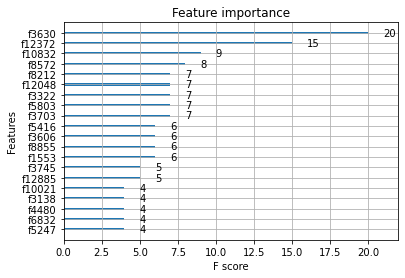

In [13]:
from xgboost import plot_importance
from xgboost import plot_tree

plot_importance(xgboostModel, max_num_features=20)
print('特徵重要程度: ',xgboostModel.feature_importances_)
F_score_of_features = xgboostModel.feature_importances_

# 對特徵重要程度做一些標準化
max = np.max(F_score_of_features)
for i in range(len(F_score_of_features)):
    F_score_of_features[i] = F_score_of_features[i]/max

list_of_selected_features = []

for i in range(len(F_score_of_features)):
    if(F_score_of_features[i]>0.1):
        # print(f'i: {i}, F_score_of_features[{i}]={F_score_of_features[i]}')
        list_of_selected_features.append(i)

print(f'依照各 feature 之 F-score 所佔整體比例，列出一些重要的 features index \n {list_of_selected_features}')
print(f'Shape of list_of_selected_features: {np.array(list_of_selected_features).shape}')
columns_value = list(train_data.columns.values)
print(f'F score 最高的 feature, f3630: {columns_value[3630]}')
print(f'F score 第二的 feature, f12372: {columns_value[12372]}')
most_significant_feature = columns_value[3630]
second_significant_feature = columns_value[12372]

---
### XGBoost - 依照選擇的 features 縮小 training dataset 規模
* 留下 193 個 Features。

In [14]:
train_data = train_data[train_data.columns[list_of_selected_features]]
train_data

,LAS1L,TMEM132A,TAC1,ST7L,JARID2,TFAP2B,MASP2,SLC7A14,ZC3H3,RUNX3,...,TYW1,LY6G6C,CDSN,C12orf73,XKR4,KLHL23,ANXA2P1,CAPN14,PRRT4,C5orf58
0,0.090621,-1.174699,-0.290798,-0.340903,-0.091092,-0.299680,0.093374,0.038867,-0.595341,2.162471,...,-0.264375,-0.691296,1.424432,2.119742,-0.555555,-0.065435,1.767086,0.234309,-0.284610,0.602435
1,-0.684976,0.372381,-0.372384,1.675423,0.676700,2.494716,-0.724004,-0.275808,0.416229,1.122568,...,0.155852,-0.284693,-1.020935,2.118523,0.219813,0.952351,-1.482991,1.396267,1.538124,0.060553
2,0.047378,0.555211,0.427284,-0.298340,-0.556784,-0.389630,0.264763,-0.344955,-0.121931,-0.744085,...,-2.599944,-0.295362,-1.158848,-1.677211,-0.258712,-0.151498,0.658588,-1.090636,-0.492626,5.039093
3,1.210261,0.356809,-0.322791,0.022258,-0.392546,-0.387903,-0.617401,-0.634486,-0.369865,-0.746947,...,-0.614504,-0.609790,0.421607,-0.094355,2.658136,-2.421704,0.158434,-0.417871,-0.439759,-0.628463
4,-1.009018,0.795128,-0.206549,-0.736805,-0.339485,-0.307862,-0.368686,-0.471707,0.123647,-0.819589,...,-0.555369,-0.697784,-1.415658,-0.515376,-0.333633,0.394159,-0.456166,0.779732,-0.429891,0.164221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,-0.805867,-0.411393,-0.038240,-0.203524,-1.872968,-0.351217,-0.253360,-0.199636,-0.239266,-0.761735,...,1.383673,0.720013,-0.568382,-0.519319,0.020175,-0.579949,0.291742,9.185039,0.421050,-0.993963
395,-0.390766,1.063125,-0.040429,-0.565966,0.835882,-0.455724,-0.298497,1.582913,-0.557129,0.321692,...,-1.203343,-0.696324,-1.084640,0.475575,-0.388870,0.523335,0.067743,-0.600553,-0.840052,-0.059513
396,1.698134,-0.620160,-0.137878,5.274068,-0.162986,-0.379256,0.112906,-0.388067,0.504970,-0.938828,...,1.479629,-0.351582,-1.490005,-0.844131,-0.200177,0.584993,-0.504876,-0.417749,-0.453951,-0.128086
397,0.818350,-0.402341,-0.492001,-1.111064,0.890493,-0.217317,0.683036,0.523085,-0.066530,-0.644596,...,-0.558604,-0.305136,-0.341699,-0.904571,0.261167,1.353124,0.266901,1.245832,0.324826,0.644378


---
## II. 減少 Features 數量後，使用 KNN 進行訓練

In [15]:
from sklearn.model_selection import train_test_split
X = train_data
y = train_data_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (279, 193)
test shape: (120, 193)


In [16]:

from sklearn.neighbors import KNeighborsClassifier

# 建立 KNN 模型
knnModel = KNeighborsClassifier(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(X_train,y_train)
# 使用訓練資料預測分類
predicted = knnModel.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [17]:
# 預測成功的比例
print('訓練集: ',knnModel.score(X_train,y_train))
print('測試集: ',knnModel.score(X_test,y_test))

訓練集:  0.8100358422939068
測試集:  0.7333333333333333


In [18]:
train_data_columns_values = list(train_data.columns.values)
print(train_data_columns_values[0])
print(train_data_columns_values[1])

LAS1L
TMEM132A


#### 測試集真實分類

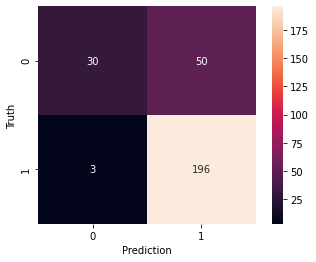

In [19]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_train, predicted)
sns.heatmap(cmatrix, square=True, annot=True, cbar=True, fmt="")
plot = plt.xlabel("Prediction")
plot = plt.ylabel("Truth")
plt.show(plot)

---
## Appendix I. 用去年的檔案做 test dataset 額外測試
* GDSC_2014
> 874 rows x 7964 columns
* Docetaxel_info
> 882 rows x 4 columns

In [20]:
GDSC_2014 = pd.read_csv('old_data/GDSC_2014_Docetaxel.csv')
GDSC_2014.columns.values[0] = "CELL_LINE_NAME"
GDSC_2014

,CELL_LINE_NAME,TSPAN6,DPM1,SCYL3,FGR,CFH,GCLC,NFYA,NIPAL3,LAS1L,...,HMBS,POLG2,KLRAP1,ZNF253,LSM14A,ZNF271,MGAM,CUX1,LINC00657,MIA
0,MC-CAR,-1.769846,0.400914,1.105859,5.273548,-0.449041,-0.834425,0.299299,-0.962201,0.326342,...,-0.304485,-0.142740,0.548650,-0.465486,0.474520,-0.188035,0.160920,-1.582164,-2.513445,0.071012
1,PFSK-1,0.588378,-0.103290,0.166505,-0.297676,2.266208,-1.103575,0.866417,-2.435215,0.165540,...,0.812364,0.403528,-0.414190,-0.288122,-0.278615,-1.101771,-0.543656,-0.274566,-0.605579,-0.506630
2,ES5,0.823237,-0.001213,0.908039,-0.372844,0.545441,-0.368416,1.828252,0.018526,-0.803953,...,0.196354,1.533578,2.516489,1.290752,-0.086153,1.711127,-0.168805,-0.160680,1.655936,-0.375607
3,ES7,0.875342,-0.407525,-0.529472,-0.432216,-0.618602,-0.127059,1.015824,-1.367511,0.162068,...,-0.892661,-0.499647,0.781571,0.333762,0.092430,1.350906,-0.233932,-1.343521,0.569476,-0.330056
4,EW-11,0.905388,0.447038,0.063828,-0.206476,1.601144,0.054866,1.564202,-2.091522,-0.161157,...,0.696921,0.623048,0.559300,2.006470,-0.377928,1.346957,-0.370186,-1.338440,0.831166,-0.481975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,GSM4920.CEL.gz,-0.387338,-0.247269,-1.018986,-0.966635,-1.083726,0.132645,0.344232,-0.735549,0.450538,...,0.301758,0.781130,-1.056497,-0.533998,0.437040,-0.124040,0.057015,0.519341,-0.167821,-0.413653
870,GSM4921.CEL.gz,-1.998162,0.143356,0.568697,-0.409379,-0.036157,-0.989200,-0.359659,-0.148297,-0.037508,...,-0.054888,0.669805,0.562455,-0.509446,0.732023,1.684043,-1.007271,0.649626,2.529043,-0.455595
871,GSM4922.CEL.gz,0.536508,-1.008963,-0.636448,-0.604762,-0.112331,-0.158117,0.010157,-0.054590,-0.661794,...,-0.853691,-0.169382,0.269382,1.088433,0.274790,-1.225755,0.461629,-1.121189,-0.345219,-0.419341
872,GSM4923.CEL.gz,-0.326383,2.269637,-1.098083,0.102508,0.946908,0.182853,-0.355514,-0.303956,-1.005288,...,1.256105,0.264163,-0.414128,-0.330747,0.880693,0.022441,-0.205577,0.073171,1.875656,-0.302108


In [21]:
Docetaxel_info = pd.read_csv('old_data/Docetaxel_info.csv', index_col=0)
R_or_S_bool_for_Docetaxel_info = np.asarray(Docetaxel_info["IC50"]>0.0125)
R_or_S_for_Docetaxel_info = []
for i in range(len(R_or_S_bool_for_Docetaxel_info)):
    if R_or_S_bool_for_Docetaxel_info[i] == True:
        R_or_S_for_Docetaxel_info.append(0)
    else:
        R_or_S_for_Docetaxel_info.append(1)
Docetaxel_info = Docetaxel_info.assign(R_or_S = R_or_S_for_Docetaxel_info)

Docetaxel_info

,CELL_LINE_NAME,DRUG_NAME,MAX_CONC_MICROMOLAR,IC50,R_or_S
1,MC-CAR,Docetaxel,0.0125,0.007317,1
2,PFSK-1,Docetaxel,0.0125,0.001761,1
3,ES5,Docetaxel,0.0125,0.001184,1
4,ES7,Docetaxel,0.0125,0.000550,1
5,EW-11,Docetaxel,0.0125,0.001664,1
...,...,...,...,...,...
878,SNU-81,Docetaxel,0.0125,0.020500,0
879,SNU-C5,Docetaxel,0.0125,0.003034,1
880,DIFI,Docetaxel,0.0125,0.007416,1
881,LIM1215,Docetaxel,0.0125,0.369300,0


### 合併 GDSC_2014 的所有資料，並依照「最大用藥濃度」，加上欄位 "R_or_S"。

In [22]:
GDSC_2014_combination = pd.merge(GDSC_2014, Docetaxel_info,
                                 how= 'inner',
                                 on=['CELL_LINE_NAME'])
GDSC_2014_combination

,CELL_LINE_NAME,TSPAN6,DPM1,SCYL3,FGR,CFH,GCLC,NFYA,NIPAL3,LAS1L,...,LSM14A,ZNF271,MGAM,CUX1,LINC00657,MIA,DRUG_NAME,MAX_CONC_MICROMOLAR,IC50,R_or_S
0,MC-CAR,-1.769846,0.400914,1.105859,5.273548,-0.449041,-0.834425,0.299299,-0.962201,0.326342,...,0.474520,-0.188035,0.160920,-1.582164,-2.513445,0.071012,Docetaxel,0.0125,0.007317,1
1,PFSK-1,0.588378,-0.103290,0.166505,-0.297676,2.266208,-1.103575,0.866417,-2.435215,0.165540,...,-0.278615,-1.101771,-0.543656,-0.274566,-0.605579,-0.506630,Docetaxel,0.0125,0.001761,1
2,ES5,0.823237,-0.001213,0.908039,-0.372844,0.545441,-0.368416,1.828252,0.018526,-0.803953,...,-0.086153,1.711127,-0.168805,-0.160680,1.655936,-0.375607,Docetaxel,0.0125,0.001184,1
3,ES7,0.875342,-0.407525,-0.529472,-0.432216,-0.618602,-0.127059,1.015824,-1.367511,0.162068,...,0.092430,1.350906,-0.233932,-1.343521,0.569476,-0.330056,Docetaxel,0.0125,0.000550,1
4,EW-11,0.905388,0.447038,0.063828,-0.206476,1.601144,0.054866,1.564202,-2.091522,-0.161157,...,-0.377928,1.346957,-0.370186,-1.338440,0.831166,-0.481975,Docetaxel,0.0125,0.001664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,RCC-AB,0.496952,-0.078768,-0.204556,-0.328763,1.388162,-0.058579,0.260077,-0.371476,1.858256,...,-1.838684,1.290824,-0.278622,-1.255319,-0.885547,-0.396594,Docetaxel,0.0125,0.013015,0
846,RCC-MF,0.521452,0.070943,-1.500857,-0.383419,1.747239,0.832151,-0.686938,-1.357914,-2.077452,...,-0.095697,0.113108,-0.095794,-0.116846,0.663696,-0.458881,Docetaxel,0.0125,0.026358,0
847,KMS-11,-1.741343,0.525125,0.400613,-0.202011,-0.596353,0.150066,0.089001,1.278880,0.846353,...,0.383015,-0.176005,-0.118381,0.361427,-0.410564,-0.168539,Docetaxel,0.0125,0.034812,0
848,SNU-61,0.742257,0.039385,1.755703,-0.402440,-0.415980,0.078658,-1.293900,-0.620675,0.307138,...,-1.792592,-1.439352,0.153641,-0.430387,-0.189739,-0.245107,Docetaxel,0.0125,0.162531,0


### 對 GDSC_2014_Combination 與 GDSC_Combination 的欄位做 Intersection

In [23]:
Columns_Intersection_ver2 = GDSC_combination.columns.intersection(GDSC_2014_combination.columns)
GDSC_2014_combination_CI2 = GDSC_2014_combination[Columns_Intersection_ver2]
GDSC_combination_CI2 = GDSC_combination[Columns_Intersection_ver2]

### 去除 GDSC_2014_Combination 中與 GDSC_Combination 重複的資料

In [24]:
GDSC_2014_combination_CI2

,CELL_LINE_NAME,TSPAN6,DPM1,SCYL3,FGR,CFH,GCLC,NFYA,NIPAL3,LAS1L,...,HMBS,POLG2,ZNF253,LSM14A,MGAM,CUX1,MIA,MAX_CONC_MICROMOLAR,IC50,R_or_S
0,MC-CAR,-1.769846,0.400914,1.105859,5.273548,-0.449041,-0.834425,0.299299,-0.962201,0.326342,...,-0.304485,-0.142740,-0.465486,0.474520,0.160920,-1.582164,0.071012,0.0125,0.007317,1
1,PFSK-1,0.588378,-0.103290,0.166505,-0.297676,2.266208,-1.103575,0.866417,-2.435215,0.165540,...,0.812364,0.403528,-0.288122,-0.278615,-0.543656,-0.274566,-0.506630,0.0125,0.001761,1
2,ES5,0.823237,-0.001213,0.908039,-0.372844,0.545441,-0.368416,1.828252,0.018526,-0.803953,...,0.196354,1.533578,1.290752,-0.086153,-0.168805,-0.160680,-0.375607,0.0125,0.001184,1
3,ES7,0.875342,-0.407525,-0.529472,-0.432216,-0.618602,-0.127059,1.015824,-1.367511,0.162068,...,-0.892661,-0.499647,0.333762,0.092430,-0.233932,-1.343521,-0.330056,0.0125,0.000550,1
4,EW-11,0.905388,0.447038,0.063828,-0.206476,1.601144,0.054866,1.564202,-2.091522,-0.161157,...,0.696921,0.623048,2.006470,-0.377928,-0.370186,-1.338440,-0.481975,0.0125,0.001664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,RCC-AB,0.496952,-0.078768,-0.204556,-0.328763,1.388162,-0.058579,0.260077,-0.371476,1.858256,...,-0.036790,-1.609718,0.823945,-1.838684,-0.278622,-1.255319,-0.396594,0.0125,0.013015,0
846,RCC-MF,0.521452,0.070943,-1.500857,-0.383419,1.747239,0.832151,-0.686938,-1.357914,-2.077452,...,-2.845608,-0.040975,-0.814976,-0.095697,-0.095794,-0.116846,-0.458881,0.0125,0.026358,0
847,KMS-11,-1.741343,0.525125,0.400613,-0.202011,-0.596353,0.150066,0.089001,1.278880,0.846353,...,-1.131963,1.137213,-0.156622,0.383015,-0.118381,0.361427,-0.168539,0.0125,0.034812,0
848,SNU-61,0.742257,0.039385,1.755703,-0.402440,-0.415980,0.078658,-1.293900,-0.620675,0.307138,...,0.822473,-1.717727,-0.458384,-1.792592,0.153641,-0.430387,-0.245107,0.0125,0.162531,0


In [25]:
GDSC_combination_CI2


,CELL_LINE_NAME,TSPAN6,DPM1,SCYL3,FGR,CFH,GCLC,NFYA,NIPAL3,LAS1L,...,HMBS,POLG2,ZNF253,LSM14A,MGAM,CUX1,MIA,MAX_CONC_MICROMOLAR,IC50,R_or_S
0,MC-CAR,-1.184016,0.485299,0.951035,3.574280,-0.334766,-0.829344,0.108484,-0.895638,0.090621,...,-0.260078,-0.397456,-0.709759,0.221923,0.115369,-1.395520,0.157138,0.1024,0.026059,1
1,SK-ES-1,0.949128,-1.142175,0.221316,-0.500133,0.163121,-0.434605,0.731411,-0.403498,-0.684976,...,0.590399,0.642555,0.117262,-0.121522,-0.372893,-1.134981,-0.407149,0.1024,0.014512,1
2,8-MG-BA,0.788220,0.628150,-1.331285,-0.386293,-0.297668,-0.212430,-0.595989,-0.031790,0.047378,...,-1.900079,0.370304,-0.575300,0.678558,0.005288,-1.059077,-0.078537,0.1024,0.005537,1
3,GB-1,0.053174,-0.181854,-0.633104,-0.469195,-0.684658,-0.905626,-0.943263,0.567066,1.210261,...,-1.178069,0.631617,-1.237564,-0.885086,-0.557999,-0.898975,-0.194579,0.1024,0.040831,1
4,NCI-H1648,1.519261,0.226856,-0.179698,-0.440831,1.035865,1.694665,-0.776114,0.652482,-1.009018,...,0.320620,-0.593656,-0.747390,-1.628074,-0.008594,-0.276213,-0.480206,0.1024,0.005043,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,CL-11,0.509973,-0.601671,-0.464114,-0.483587,-0.443398,-0.753786,-1.131533,0.229900,-0.805867,...,0.814728,-2.298801,-0.538877,-0.745097,-0.014526,1.226025,0.454603,0.1024,1.327531,0
395,COR-L95,-0.206808,-0.545395,-0.429504,-0.619859,-0.649944,2.319067,-1.632986,1.959019,-0.390766,...,0.033877,-2.208924,0.230450,0.326741,-0.340659,-0.502672,-0.416340,0.1024,0.188277,0
396,NCI-H2135,1.066798,-0.570217,-0.570037,-0.252140,-0.148907,2.366973,0.731261,0.006751,1.698134,...,1.086044,1.946182,-0.836099,-2.050881,0.070497,-0.748525,-0.095038,0.1024,0.109464,0
397,ME-1,-1.079919,0.063834,0.553150,-0.325923,-0.550151,0.670671,0.755751,-0.258106,0.818350,...,0.086922,1.162167,0.045504,0.204106,-0.094888,0.504131,0.303012,0.1024,0.580227,0


#### 移除 GDSC_combination 與 GDSC_2014_combination 中重複出現的藥來當做 test dataset。

In [26]:
complement_dataset = GDSC_combination_CI2.append(GDSC_2014_combination_CI2)
complement_dataset = complement_dataset.drop_duplicates(subset=['CELL_LINE_NAME'], keep=False)
complement_dataset

,CELL_LINE_NAME,TSPAN6,DPM1,SCYL3,FGR,CFH,GCLC,NFYA,NIPAL3,LAS1L,...,HMBS,POLG2,ZNF253,LSM14A,MGAM,CUX1,MIA,MAX_CONC_MICROMOLAR,IC50,R_or_S
23,NCI-H1355,0.694175,-1.588703,-0.706262,-0.382877,3.336392,1.627102,-1.226033,0.389085,0.339801,...,0.780171,1.486559,-0.606972,-0.337263,-0.370325,-0.016176,-0.319341,0.1024,0.009378,1
26,HCC1599,1.159802,0.620802,0.651116,-0.426399,-0.436374,0.656638,-0.213248,0.375916,-0.543301,...,-0.454785,0.207192,1.117219,2.353777,-0.324972,-0.040295,1.216848,0.1024,0.024454,1
35,HCE-4,0.834073,-0.354527,0.125421,-0.381831,0.474077,1.205168,-0.493031,0.712561,-0.994481,...,0.686312,0.260363,-0.649462,-1.304175,-0.209374,-0.331843,-0.416314,0.1024,0.004939,1
44,LB996-RCC,0.867308,-0.366672,-0.710241,-0.319721,1.975316,0.264148,-1.150333,-1.121479,-1.376796,...,0.353963,-0.766168,-0.007203,-0.618723,-0.394133,1.325593,-0.564857,0.1024,0.055897,1
49,MZ7-mel,0.806828,0.183147,0.212946,-0.331301,0.822614,-0.780350,-0.281951,-1.907271,-0.611553,...,-0.450540,-1.631156,-0.832171,-1.343890,8.217271,-0.080958,0.296318,0.1024,0.020126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,RCC-AB,0.496952,-0.078768,-0.204556,-0.328763,1.388162,-0.058579,0.260077,-0.371476,1.858256,...,-0.036790,-1.609718,0.823945,-1.838684,-0.278622,-1.255319,-0.396594,0.0125,0.013015,0
846,RCC-MF,0.521452,0.070943,-1.500857,-0.383419,1.747239,0.832151,-0.686938,-1.357914,-2.077452,...,-2.845608,-0.040975,-0.814976,-0.095697,-0.095794,-0.116846,-0.458881,0.0125,0.026358,0
847,KMS-11,-1.741343,0.525125,0.400613,-0.202011,-0.596353,0.150066,0.089001,1.278880,0.846353,...,-1.131963,1.137213,-0.156622,0.383015,-0.118381,0.361427,-0.168539,0.0125,0.034812,0
848,SNU-61,0.742257,0.039385,1.755703,-0.402440,-0.415980,0.078658,-1.293900,-0.620675,0.307138,...,0.822473,-1.717727,-0.458384,-1.792592,0.153641,-0.430387,-0.245107,0.0125,0.162531,0


* 如何合併 pandas dataframe 而沒有重複行，參考：https://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns

In [27]:
# 我不知道我花時間弄這部分幹嘛，因為 intersection_dataset 其實就是 GDSC_combination_CI2。
cols_to_use = GDSC_2014_combination_CI2.columns.difference(GDSC_combination_CI2.columns)
intersection_dataset = pd.merge(GDSC_combination_CI2, GDSC_2014_combination_CI2[cols_to_use],
                                left_index=True, right_index=True,
                                how='outer')
intersection_dataset = intersection_dataset.dropna(how='all')
intersection_dataset

,CELL_LINE_NAME,TSPAN6,DPM1,SCYL3,FGR,CFH,GCLC,NFYA,NIPAL3,LAS1L,...,HMBS,POLG2,ZNF253,LSM14A,MGAM,CUX1,MIA,MAX_CONC_MICROMOLAR,IC50,R_or_S
0,MC-CAR,-1.184016,0.485299,0.951035,3.574280,-0.334766,-0.829344,0.108484,-0.895638,0.090621,...,-0.260078,-0.397456,-0.709759,0.221923,0.115369,-1.395520,0.157138,0.1024,0.026059,1.0
1,SK-ES-1,0.949128,-1.142175,0.221316,-0.500133,0.163121,-0.434605,0.731411,-0.403498,-0.684976,...,0.590399,0.642555,0.117262,-0.121522,-0.372893,-1.134981,-0.407149,0.1024,0.014512,1.0
2,8-MG-BA,0.788220,0.628150,-1.331285,-0.386293,-0.297668,-0.212430,-0.595989,-0.031790,0.047378,...,-1.900079,0.370304,-0.575300,0.678558,0.005288,-1.059077,-0.078537,0.1024,0.005537,1.0
3,GB-1,0.053174,-0.181854,-0.633104,-0.469195,-0.684658,-0.905626,-0.943263,0.567066,1.210261,...,-1.178069,0.631617,-1.237564,-0.885086,-0.557999,-0.898975,-0.194579,0.1024,0.040831,1.0
4,NCI-H1648,1.519261,0.226856,-0.179698,-0.440831,1.035865,1.694665,-0.776114,0.652482,-1.009018,...,0.320620,-0.593656,-0.747390,-1.628074,-0.008594,-0.276213,-0.480206,0.1024,0.005043,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,CL-11,0.509973,-0.601671,-0.464114,-0.483587,-0.443398,-0.753786,-1.131533,0.229900,-0.805867,...,0.814728,-2.298801,-0.538877,-0.745097,-0.014526,1.226025,0.454603,0.1024,1.327531,0.0
395,COR-L95,-0.206808,-0.545395,-0.429504,-0.619859,-0.649944,2.319067,-1.632986,1.959019,-0.390766,...,0.033877,-2.208924,0.230450,0.326741,-0.340659,-0.502672,-0.416340,0.1024,0.188277,0.0
396,NCI-H2135,1.066798,-0.570217,-0.570037,-0.252140,-0.148907,2.366973,0.731261,0.006751,1.698134,...,1.086044,1.946182,-0.836099,-2.050881,0.070497,-0.748525,-0.095038,0.1024,0.109464,0.0
397,ME-1,-1.079919,0.063834,0.553150,-0.325923,-0.550151,0.670671,0.755751,-0.258106,0.818350,...,0.086922,1.162167,0.045504,0.204106,-0.094888,0.504131,0.303012,0.1024,0.580227,0.0


### 測試能不能用在 XGBoost Model 上，切割資料集為 training set 與 training set 的 label
* 不行，所以重新 fit 一個模型，觀察 transfer learning 的效果。
* 用 GDSC_combination_CI2 建立模型，觀察用模型分類 complement dataset 的效果。

In [28]:
train_data_ver2 = GDSC_combination_CI2.drop(labels=["CELL_LINE_NAME", "IC50", "R_or_S", "MAX_CONC_MICROMOLAR"],
                                            axis=1)
train_data_ver2

,TSPAN6,DPM1,SCYL3,FGR,CFH,GCLC,NFYA,NIPAL3,LAS1L,ENPP4,...,SLC22A18AS,KRTAP5.9,CTSO,HMBS,POLG2,ZNF253,LSM14A,MGAM,CUX1,MIA
0,-1.184016,0.485299,0.951035,3.574280,-0.334766,-0.829344,0.108484,-0.895638,0.090621,0.237435,...,0.053944,1.791199,2.018790,-0.260078,-0.397456,-0.709759,0.221923,0.115369,-1.395520,0.157138
1,0.949128,-1.142175,0.221316,-0.500133,0.163121,-0.434605,0.731411,-0.403498,-0.684976,-0.871157,...,-0.653392,1.077150,-0.868983,0.590399,0.642555,0.117262,-0.121522,-0.372893,-1.134981,-0.407149
2,0.788220,0.628150,-1.331285,-0.386293,-0.297668,-0.212430,-0.595989,-0.031790,0.047378,0.306316,...,-0.094999,-1.468200,-0.292654,-1.900079,0.370304,-0.575300,0.678558,0.005288,-1.059077,-0.078537
3,0.053174,-0.181854,-0.633104,-0.469195,-0.684658,-0.905626,-0.943263,0.567066,1.210261,-1.389713,...,-0.335271,-0.981787,0.931632,-1.178069,0.631617,-1.237564,-0.885086,-0.557999,-0.898975,-0.194579
4,1.519261,0.226856,-0.179698,-0.440831,1.035865,1.694665,-0.776114,0.652482,-1.009018,0.625994,...,-0.252108,-0.581347,1.122181,0.320620,-0.593656,-0.747390,-1.628074,-0.008594,-0.276213,-0.480206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.509973,-0.601671,-0.464114,-0.483587,-0.443398,-0.753786,-1.131533,0.229900,-0.805867,-0.172314,...,0.230744,0.144657,1.018407,0.814728,-2.298801,-0.538877,-0.745097,-0.014526,1.226025,0.454603
395,-0.206808,-0.545395,-0.429504,-0.619859,-0.649944,2.319067,-1.632986,1.959019,-0.390766,1.966676,...,-0.364017,-0.612042,-0.268816,0.033877,-2.208924,0.230450,0.326741,-0.340659,-0.502672,-0.416340
396,1.066798,-0.570217,-0.570037,-0.252140,-0.148907,2.366973,0.731261,0.006751,1.698134,-0.975346,...,6.444843,1.967695,0.477780,1.086044,1.946182,-0.836099,-2.050881,0.070497,-0.748525,-0.095038
397,-1.079919,0.063834,0.553150,-0.325923,-0.550151,0.670671,0.755751,-0.258106,0.818350,-1.034081,...,-0.386574,1.179877,-0.761857,0.086922,1.162167,0.045504,0.204106,-0.094888,0.504131,0.303012


In [29]:
train_data_ver2_label = GDSC_combination_CI2[["R_or_S"]]
train_data_ver2_label

,R_or_S
0,1
1,1
2,1
3,1
4,1
...,...
394,0
395,0
396,0
397,0


In [30]:
test_data_ver2 = complement_dataset.drop(labels=["CELL_LINE_NAME", "IC50", "R_or_S", "MAX_CONC_MICROMOLAR"],
                                          axis=1)
test_data_ver2

,TSPAN6,DPM1,SCYL3,FGR,CFH,GCLC,NFYA,NIPAL3,LAS1L,ENPP4,...,SLC22A18AS,KRTAP5.9,CTSO,HMBS,POLG2,ZNF253,LSM14A,MGAM,CUX1,MIA
23,0.694175,-1.588703,-0.706262,-0.382877,3.336392,1.627102,-1.226033,0.389085,0.339801,0.240063,...,-0.371449,0.932659,-0.151512,0.780171,1.486559,-0.606972,-0.337263,-0.370325,-0.016176,-0.319341
26,1.159802,0.620802,0.651116,-0.426399,-0.436374,0.656638,-0.213248,0.375916,-0.543301,0.621998,...,-0.607614,-1.005951,-0.419375,-0.454785,0.207192,1.117219,2.353777,-0.324972,-0.040295,1.216848
35,0.834073,-0.354527,0.125421,-0.381831,0.474077,1.205168,-0.493031,0.712561,-0.994481,-0.025201,...,-0.444083,-0.957769,0.811104,0.686312,0.260363,-0.649462,-1.304175,-0.209374,-0.331843,-0.416314
44,0.867308,-0.366672,-0.710241,-0.319721,1.975316,0.264148,-1.150333,-1.121479,-1.376796,0.185323,...,1.051786,-1.396040,2.630600,0.353963,-0.766168,-0.007203,-0.618723,-0.394133,1.325593,-0.564857
49,0.806828,0.183147,0.212946,-0.331301,0.822614,-0.780350,-0.281951,-1.907271,-0.611553,-1.382446,...,1.550194,-0.579327,1.243757,-0.450540,-1.631156,-0.832171,-1.343890,8.217271,-0.080958,0.296318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.496952,-0.078768,-0.204556,-0.328763,1.388162,-0.058579,0.260077,-0.371476,1.858256,0.536313,...,0.114501,-0.046942,0.565485,-0.036790,-1.609718,0.823945,-1.838684,-0.278622,-1.255319,-0.396594
846,0.521452,0.070943,-1.500857,-0.383419,1.747239,0.832151,-0.686938,-1.357914,-2.077452,0.321634,...,-0.765838,-0.645352,0.646170,-2.845608,-0.040975,-0.814976,-0.095697,-0.095794,-0.116846,-0.458881
847,-1.741343,0.525125,0.400613,-0.202011,-0.596353,0.150066,0.089001,1.278880,0.846353,0.878078,...,-0.664306,-0.723026,2.573850,-1.131963,1.137213,-0.156622,0.383015,-0.118381,0.361427,-0.168539
848,0.742257,0.039385,1.755703,-0.402440,-0.415980,0.078658,-1.293900,-0.620675,0.307138,-0.238477,...,0.929735,1.780790,1.428808,0.822473,-1.717727,-0.458384,-1.792592,0.153641,-0.430387,-0.245107


In [31]:
test_data_ver2_label = complement_dataset[["R_or_S"]]
test_data_ver2_label

,R_or_S
23,1
26,1
35,1
44,1
49,1
...,...
845,0
846,0
847,0
848,0


#### K-Fold Cross Validation

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

xgboostModel_1 = XGBClassifier(n_estimators=100, learning_rate=0.3)
kfold = KFold(n_splits=5)
results = cross_val_score(xgboostModel_1, train_data_ver2,
                          train_data_ver2_label, cv=kfold)
print(results)
xgboostModel_1.fit(train_data_ver2, train_data_ver2_label)
predicted_1 = xgboostModel_1.predict(train_data_ver2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[0.675  0.8625 0.75   0.6    0.    ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


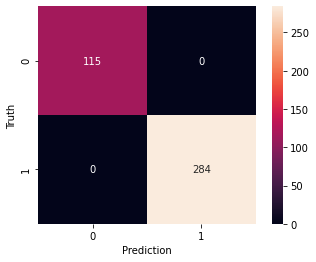

In [33]:
from sklearn.metrics import confusion_matrix
mat_2 = confusion_matrix(train_data_ver2_label, predicted_1)
sns.heatmap(mat_2, square=True, annot=True, cbar=True, fmt="")
plot2 = plt.xlabel("Prediction")
plot2 = plt.ylabel("Truth")
plt.show(plot2)

In [34]:
classification = xgboostModel_1.predict(test_data_ver2)
print(xgboostModel_1.score(test_data_ver2, test_data_ver2_label))

0.7645951035781544


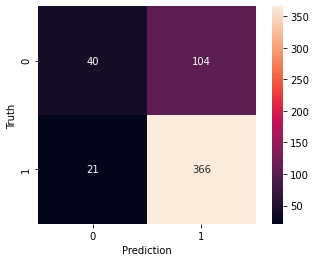

In [35]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_data_ver2_label, classification)
sns.heatmap(mat, square=True, annot=True, cbar=True, fmt="")
plot3 = plt.xlabel("Prediction")
plot3 = plt.ylabel("Truth")
plt.show(plot3)

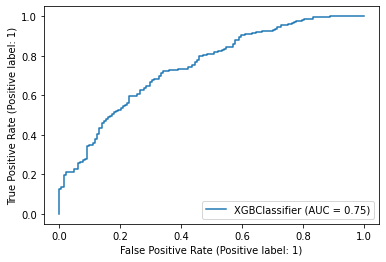

In [36]:
from sklearn import metrics
metrics.plot_roc_curve(xgboostModel_1, test_data_ver2, test_data_ver2_label)
plt.show()

---
### 為了能套 KNN 模型，選擇能丟進 KNN 的 Features

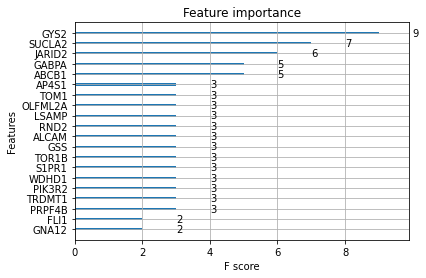

In [44]:
plot_importance(xgboostModel_1, max_num_features=20)
F_score = xgboostModel_1.feature_importances_

maximum = np.max(F_score)
for i in range(len(F_score)):
    F_score[i] = F_score[i]/maximum

selected_features = []

for j in range(len(F_score)):
    if(F_score[j]>0.05):
        selected_features.append(j)

selected_features_columns = list(train_data_ver2.columns.values)

In [45]:
train_data_ver3 = train_data_ver2[train_data_ver2.columns[selected_features]]
train_data_ver3_label = train_data_ver2_label
train_data_ver3

,SCYL3,TFPI,CREBBP,FARP2,COX10,ELAC2,DNAH9,JARID2,TFAP2B,ST3GAL1,...,WDHD1,F5,TBKBP1,ZDHHC18,COL15A1,LY6G6C,TSN,ANKRD34C,KIFC1,KCTD7
0,0.951035,-0.311456,-1.445098,-1.135687,1.230127,0.873313,0.145528,-0.091092,-0.299680,-0.253996,...,0.830597,4.041074,0.152310,1.773680,-0.544359,-0.691296,-0.763786,0.745161,0.028943,-0.210998
1,0.221316,0.954138,0.525603,-1.635770,-0.510872,0.286982,-0.294978,0.676700,2.494716,-0.270980,...,-0.285381,-0.304704,1.745957,-0.150983,-0.364807,-0.284693,-0.588146,0.047688,-0.017960,0.677648
2,-1.331285,0.072676,-0.456793,-1.208556,0.376115,0.432351,-0.103712,-0.556784,-0.389630,-0.862575,...,-0.404647,-0.261360,0.427955,-0.097169,-0.339642,-0.295362,-0.945419,0.068166,0.975244,-0.821537
3,-0.633104,0.532911,1.568612,-0.788367,-0.540366,-0.181718,-0.216102,-0.392546,-0.387903,-0.006970,...,-0.420650,-0.303962,-0.945854,-0.467249,0.858260,-0.609790,-1.345367,-0.236557,0.682728,-0.061913
4,-0.179698,1.198062,-0.756638,-0.184338,-1.495408,-0.047127,-0.814545,-0.339485,-0.307862,-0.952419,...,-0.460891,0.914016,-0.889439,-1.715246,-0.453245,-0.697784,0.282183,-0.597051,-1.177945,0.251820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,-0.464114,0.763124,0.502697,-0.107048,-0.814896,-1.200744,-0.600622,-1.872968,-0.351217,-0.817666,...,-0.543514,-0.205006,-0.407093,-0.201530,-0.307025,0.720013,0.126058,-1.047707,-0.723088,-1.197841
395,-0.429504,0.508878,-1.880635,-1.473852,-0.244068,-1.929538,-0.475725,0.835882,-0.455724,-1.348797,...,0.213361,-0.129072,-1.755435,-0.467558,-0.316814,-0.696324,-0.409264,0.830119,0.876107,-0.955755
396,-0.570037,-0.380249,-0.813330,-0.583003,1.257143,0.877914,0.538156,-0.162986,-0.379256,-0.870910,...,-0.902281,-0.047985,1.233446,-0.280928,-0.196212,-0.351582,0.353998,-0.143224,-1.419185,-0.207303
397,0.553150,0.459727,0.782790,-0.062374,-0.416849,-0.425748,0.129832,0.890493,-0.217317,1.546547,...,-0.876046,0.239777,1.146151,-0.934712,-0.516442,-0.305136,0.250649,0.388641,-0.489099,-1.189126


In [46]:
test_data_ver3 = test_data_ver2[test_data_ver2.columns[selected_features]]
test_data_ver3_label = test_data_ver2_label
test_data_ver3

,SCYL3,TFPI,CREBBP,FARP2,COX10,ELAC2,DNAH9,JARID2,TFAP2B,ST3GAL1,...,WDHD1,F5,TBKBP1,ZDHHC18,COL15A1,LY6G6C,TSN,ANKRD34C,KIFC1,KCTD7
23,-0.706262,2.023631,-0.948577,0.470166,-0.325455,0.422316,-0.660014,-0.372443,-0.327406,-0.678183,...,-0.523462,-0.386339,0.877407,0.963436,-0.454447,0.006205,-1.030568,-0.536137,-0.920303,-0.686985
26,0.651116,-0.816818,0.716529,-0.966831,-0.301402,-0.268912,-0.248255,-0.608475,-0.245031,-0.689391,...,-0.894695,-0.392890,1.019081,0.539867,-0.170068,-0.298367,0.118182,0.211836,0.225396,-0.519673
35,0.125421,1.142883,0.135748,-0.126084,1.091235,1.451480,-0.327373,-0.701657,-0.371124,-0.772613,...,0.616389,-0.285299,0.307973,0.346879,-0.451313,-0.236376,-0.324486,-0.785010,0.505334,-0.784699
44,-0.710241,2.270066,1.561954,-0.909202,-0.124779,0.206636,-0.106868,-1.565307,-0.461135,0.164452,...,-0.240685,0.450449,-0.960514,-0.726891,-0.431380,0.594074,0.165737,-0.744275,-1.302314,-0.695855
49,0.212946,-0.194059,-0.142490,1.358980,-0.490365,-1.288394,-0.462661,-0.158102,-0.325884,3.161030,...,0.681229,-0.262757,-1.119971,-0.603587,0.417132,-0.094803,0.194885,-0.226577,-0.254674,1.829111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,-0.204556,1.307372,-0.885648,-1.280295,-0.237660,1.161567,-0.752334,-1.286053,-0.400503,-1.029884,...,0.008006,-0.284510,-0.705489,-1.309822,0.007727,-0.389060,0.598928,0.328998,0.184292,-0.557143
846,-1.500857,1.021721,-0.846090,-0.295722,0.017814,-1.947993,-0.595884,-0.504694,-0.310452,0.866332,...,-1.429372,-0.349532,-0.637418,-0.631711,-0.208750,-0.008164,-0.347578,0.229463,-2.134007,0.853999
847,0.400613,-1.046033,1.741665,-0.220319,-0.863498,-1.398742,-0.450064,0.385316,-0.185815,1.441793,...,-0.194701,-0.263158,0.934801,0.811564,-0.055096,-0.182950,-0.642044,0.400510,0.144426,-0.025603
848,1.755703,-0.108091,0.731880,0.173110,0.319708,-0.621936,0.791068,-1.565936,-0.262070,-1.060681,...,0.777661,-0.051598,-0.967364,-1.274475,-0.433687,-0.456788,0.409107,-0.556490,0.445274,-1.775832


0.7269303201506592


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


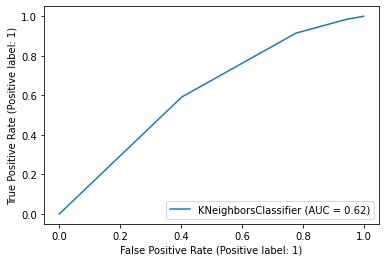

In [47]:
knnModel_2 = KNeighborsClassifier(n_neighbors=3)

knnModel_2.fit(train_data_ver3, train_data_ver3_label)

prediction = knnModel_2.predict(test_data_ver3)

print(knnModel_2.score(test_data_ver3, test_data_ver3_label))

from sklearn import metrics
metrics.plot_roc_curve(knnModel_2, test_data_ver3, test_data_ver3_label)
plt.show()

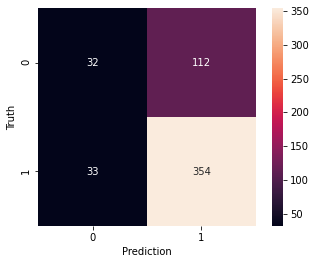

In [48]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_data_ver3_label, prediction)
sns.heatmap(mat, square=True, annot=True, cbar=True, fmt="")
plot4 = plt.xlabel("Prediction")
plot4 = plt.ylabel("Truth")
plt.show(plot4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7344632768361582


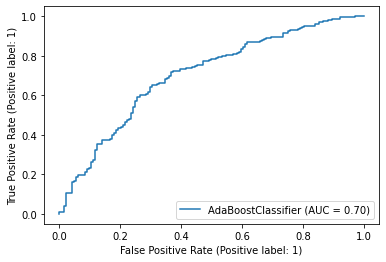

In [49]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostModel = AdaBoostClassifier()
AdaBoostModel.fit(train_data_ver3, train_data_ver3_label)

prediction_2 = AdaBoostModel.predict(test_data_ver3)
print(AdaBoostModel.score(test_data_ver3, test_data_ver3_label))
metrics.plot_roc_curve(AdaBoostModel, test_data_ver3, test_data_ver3_label)
plt.show()

In [54]:
print(AdaBoostModel.feature_importances_)

[0.   0.   0.   0.   0.02 0.   0.   0.04 0.   0.02 0.   0.02 0.   0.
 0.02 0.   0.02 0.   0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.02 0.   0.02 0.   0.   0.   0.   0.02
 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.02 0.   0.   0.04 0.   0.   0.   0.   0.   0.
 0.04 0.   0.02 0.   0.02 0.02 0.   0.   0.   0.02 0.   0.   0.   0.
 0.   0.02 0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.02 0.04 0.   0.02 0.   0.02 0.
 0.   0.   0.   0.   0.   0.02 0.   0.02 0.   0.   0.02 0.02 0.   0.
 0.02 0.   0.   0.   0.02 0.   0.   0.02 0.   0.02 0.   0.   0.   0.
 0.   0.   0.   0.02 0.   0.02 0.   0.   0.02 0.   0.   0.   0.   0.
 0.   0.04 0.04 0.   0.   0.   0.   0.02 0.   0.   0.   0.02 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.02 0.
 0.04 0.   0.  ]


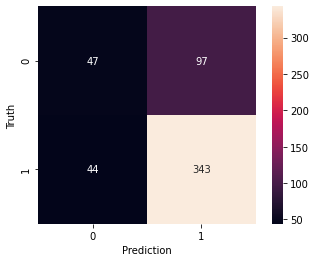

In [50]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_data_ver3_label, prediction_2)
sns.heatmap(mat, square=True, annot=True, cbar=True, fmt="")
plot5 = plt.xlabel("Prediction")
plot5 = plt.ylabel("Truth")
plt.show(plot5)

0.7777777777777778


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


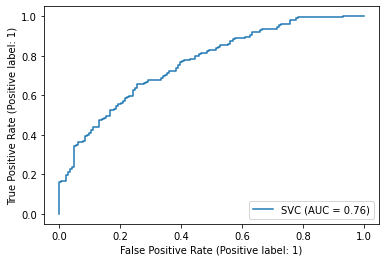

In [52]:
from sklearn.svm import SVC
SVCModel = SVC()
SVCModel.fit(train_data_ver3, train_data_ver3_label)

print(SVCModel.score(test_data_ver3, test_data_ver3_label))
prediction_3 = SVCModel.predict(test_data_ver3)
metrics.plot_roc_curve(SVCModel, test_data_ver3, test_data_ver3_label)
plt.show()


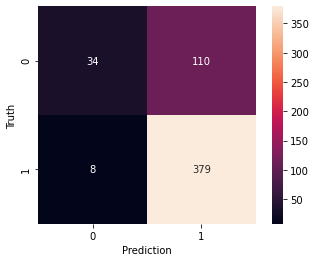

In [53]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_data_ver3_label, prediction_3)
sns.heatmap(mat, square=True, annot=True, cbar=True, fmt="")
plot6 = plt.xlabel("Prediction")
plot6 = plt.ylabel("Truth")
plt.show(plot6)